In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"kawasaki_dataset.csv",sep=",")
df.head()

,Patient ID,Date of Diagnosis,Age at Diagnosis,Gender,Ethnicity,Location,Fever Duration,Symptoms,Laboratory Tests,Echocardiography,Treatment Approach,Clinical Outcomes,Complications,Follow-up Visits,Long-Term Effects
0,11596,2017-09-26,6,Male,Caucasian,"CityA, StateZ, Country2",25,Fever,Elevated,Normal,Aspirin,Worsening,Myocarditis,Scheduled,Mild
1,37960,2015-01-02,1,Female,Asian,"CityC, StateX, Country2",9,Rash,Elevated,Normal,Aspirin,Improvement,Myocarditis,Not Scheduled,NaN
2,81187,2021-07-08,4,Male,African American,"CityB, StateZ, Country2",8,Fever,Elevated,Normal,Aspirin,Improvement,Myocarditis,Not Scheduled,NaN
3,52559,2019-11-11,2,Male,African American,"CityA, StateY, Country1",19,Rash,Normal,Normal,Aspirin,Worsening,Coronary Artery Aneurysm,Not Scheduled,Severe
4,88177,2015-12-06,8,Male,African American,"CityB, StateY, Country3",28,Rash,Normal,Normal,Aspirin,Stable,Pericarditis,Scheduled,Mild


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer

df = pd.read_csv(
    r"kawasaki_dataset.csv",
    sep=","
)

df.drop_duplicates(inplace=True)

num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns

# Imputation
num_imp = SimpleImputer(strategy="mean")
df[num_cols] = num_imp.fit_transform(df[num_cols])

if len(cat_cols) > 0:
    cat_imp = SimpleImputer(strategy="most_frequent")
    df[cat_cols] = cat_imp.fit_transform(df[cat_cols])

# Encoding
if len(cat_cols) > 0:
    le = LabelEncoder()
    for col in cat_cols:
        df[col] = le.fit_transform(df[col])

# Recalculate numeric columns
num_cols = df.select_dtypes(include=np.number).columns

# Outlier removal
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~(
    (df[num_cols] < (Q1 - 1.5 * IQR)) |
    (df[num_cols] > (Q3 + 1.5 * IQR))
).any(axis=1)]

# Scaling
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Save
df.to_csv(
    r"C:\College\IP\Project\kawasaki_dataset_cleaned.csv",
    index=False
)

print("✅ Cleaned dataset saved successfully")

✅ Cleaned dataset saved successfully


In [4]:
df.head()

,Patient ID,Date of Diagnosis,Age at Diagnosis,Gender,Ethnicity,Location,Fever Duration,Symptoms,Laboratory Tests,Echocardiography,Treatment Approach,Clinical Outcomes,Complications,Follow-up Visits,Long-Term Effects
0,0.017724,0.405535,0.294118,1.0,0.50,0.269231,0.827586,0.00,0.0,1.0,0.0,1.0,0.5,1.0,0.0
1,0.310690,0.129324,0.000000,0.0,0.25,0.730769,0.275862,0.25,0.0,1.0,0.0,0.0,0.5,0.0,1.0
2,0.791043,0.784992,0.176471,1.0,0.00,0.615385,0.241379,0.00,0.0,1.0,0.0,0.0,0.5,0.0,1.0
3,0.472919,0.618946,0.058824,1.0,0.00,0.115385,0.620690,0.25,1.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.868719,0.222991,0.411765,1.0,0.00,0.538462,0.931034,0.25,1.0,1.0,0.0,0.5,1.0,1.0,0.0


In [5]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

n_features = X.shape[1]

In [6]:
n_features

14

In [7]:
pop = 20
iter_max = 30

wolves = np.random.randint(0, 2, (pop, n_features))

def fitness(sol):
    from sklearn.model_selection import cross_val_score
    from sklearn.ensemble import RandomForestClassifier
    if np.sum(sol) == 0:
        return 0
    Xs = X[:, sol == 1]
    clf = RandomForestClassifier(n_estimators=100)
    return cross_val_score(clf, Xs, y, cv=5).mean()


In [8]:
from sklearn.feature_selection import mutual_info_classif

def fitness(sol):
    if np.sum(sol) == 0:
        return 0
    Xs = X[:, sol == 1]
    corr = np.mean(np.abs(np.corrcoef(Xs.T, y)[-1, :-1]))
    var = np.mean(np.var(Xs, axis=0))
    return 0.7 * corr + 0.3 * var


In [9]:
pop = 12
iter_max = 15

In [10]:
alpha = beta = delta = None

for t in range(iter_max):
    scores = np.array([fitness(w) for w in wolves])
    idx = np.argsort(scores)[::-1]
    alpha, beta, delta = wolves[idx[0]], wolves[idx[1]], wolves[idx[2]]

    a = 2 * (1 - (t / iter_max) ** 2)

    for i in range(pop):
        for j in range(n_features):

            r1, r2 = np.random.rand(), np.random.rand()
            A1, C1 = 2 * a * r1 - a, 2 * r2
            D1 = abs(C1 * alpha[j] - wolves[i][j])
            X1 = alpha[j] - A1 * D1

            r1, r2 = np.random.rand(), np.random.rand()
            A2, C2 = 2 * a * r1 - a, 2 * r2
            D2 = abs(C2 * beta[j] - wolves[i][j])
            X2 = beta[j] - A2 * D2

            r1, r2 = np.random.rand(), np.random.rand()
            A3, C3 = 2 * a * r1 - a, 2 * r2
            D3 = abs(C3 * delta[j] - wolves[i][j])
            X3 = delta[j] - A3 * D3

            S = (X1 + X2 + X3) / 3
            wolves[i][j] = 1 if 1/(1+np.exp(-S)) > np.random.rand() else 0

In [11]:
selected_features = list(df.columns)

drop_cols = ['Patient ID', 'Date of Diagnosis', 'Follow-up Visits']

selected_features = [f for f in selected_features if f not in drop_cols]

print("Selected Features after dropping unwanted columns:")
print(selected_features)
print("Total Selected:", len(selected_features))

Selected Features after dropping unwanted columns:
['Age at Diagnosis', 'Gender', 'Ethnicity', 'Location', 'Fever Duration', 'Symptoms', 'Laboratory Tests', 'Echocardiography', 'Treatment Approach', 'Clinical Outcomes', 'Complications', 'Long-Term Effects']
Total Selected: 12


In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

TARGET_COL = df.columns[-1]
print("Using target column:", TARGET_COL)

X = df[selected_features].values
y = df[TARGET_COL]

if y.dtype != "int64" and y.dtype != "int32":
    if y.nunique() > 10:
        # continuous → convert to classes using quantiles
        y = pd.qcut(y, q=3, labels=[0, 1, 2])
        y = y.astype(int)
    else:
        y = LabelEncoder().fit_transform(y)

y = y.astype(int)

print("Target classes:", np.unique(y))

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

svm = SVC(
    kernel="rbf",
    probability=True,
    random_state=42
)

gb = GradientBoostingClassifier(
    n_estimators=150,
    learning_rate=0.1,
    random_state=42
)

rf.fit(X_train, y_train)
svm.fit(X_train, y_train)
gb.fit(X_train, y_train)

rf_p = rf.predict_proba(X_test)
svm_p = svm.predict_proba(X_test)
gb_p = gb.predict_proba(X_test)

ensemble_proba = (rf_p + svm_p + gb_p) / 3
final_pred = np.argmax(ensemble_proba, axis=1)

print("\nOptimized Ensemble Accuracy:", accuracy_score(y_test, final_pred))
print("\nClassification Report:\n", classification_report(y_test, final_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, final_pred))


Using target column: Long-Term Effects
Target classes: [0 1]

Optimized Ensemble Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       221
           1       1.00      1.00      1.00       445

    accuracy                           1.00       666
   macro avg       1.00      1.00      1.00       666
weighted avg       1.00      1.00      1.00       666


Confusion Matrix:
 [[221   0]
 [  0 445]]


WEEK 6

In [13]:
import numpy as np
import pandas as pd

from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [14]:
gb = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)

ada = AdaBoostClassifier(
    n_estimators=300,
    learning_rate=0.05,
    random_state=42
)

gb.fit(X_train, y_train)
ada.fit(X_train, y_train)


,"estimator estimator: object, default=NoneThe base estimator from which the boosted ensemble is built.Support for sample weighting is required, as well as proper``classes_`` and ``n_classes_`` attributes. If ``None``, thenthe base estimator is :class:`~sklearn.tree.DecisionTreeClassifier`initialized with `max_depth=1`... versionadded:: 1.2 `base_estimator` was renamed to `estimator`.",None
,"n_estimators n_estimators: int, default=50The maximum number of estimators at which boosting is terminated.In case of perfect fit, the learning procedure is stopped early.Values must be in the range `[1, inf)`.",300
,"learning_rate learning_rate: float, default=1.0Weight applied to each classifier at each boosting iteration. A higherlearning rate increases the contribution of each classifier. There isa trade-off between the `learning_rate` and `n_estimators` parameters.Values must be in the range `(0.0, inf)`.",0.05
,"random_state random_state: int, RandomState instance or None, default=NoneControls the random seed given at each `estimator` at eachboosting iteration.Thus, it is only used when `estimator` exposes a `random_state`.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",42


In [15]:
gb_probs = gb.predict_proba(X_test)
ada_probs = ada.predict_proba(X_test)

In [16]:
weight_gb = 0.6
weight_ada = 0.4

In [17]:
ensemble_probs = (weight_gb * gb_probs) + (weight_ada * ada_probs)
ensemble_preds = np.argmax(ensemble_probs, axis=1)

In [18]:
accuracy = accuracy_score(y_test, ensemble_preds)
precision = precision_score(y_test, ensemble_preds, average='weighted')
recall = recall_score(y_test, ensemble_preds, average='weighted')
f1 = f1_score(y_test, ensemble_preds, average='weighted')

# Binary AUC
auc = roc_auc_score(y_test, ensemble_probs[:, 1])

print("\n🔹 Weighted Ensemble Performance 🔹")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1-score  : {f1:.4f}")
print(f"AUC       : {auc:.4f}")


🔹 Weighted Ensemble Performance 🔹
Accuracy  : 1.0000
Precision : 1.0000
Recall    : 1.0000
F1-score  : 1.0000
AUC       : 1.0000


In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

def evaluate_model(model):
    preds = model.predict(X_test)
    probs = model.predict_proba(X_test)

    accuracy = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds, average='weighted')
    recall = recall_score(y_test, preds, average='weighted')
    f1 = f1_score(y_test, preds, average='weighted')

    n_classes = len(np.unique(y_test))

    if n_classes == 2:
        auc = roc_auc_score(y_test, probs[:, 1])
    else:
        auc = roc_auc_score(y_test, probs,
                            multi_class='ovr',
                            average='weighted')

    return [accuracy, precision, recall, f1, auc]
results = pd.DataFrame(
    {
        "Gradient Boosting": evaluate_model(gb),
        "AdaBoost": evaluate_model(ada),
        "Weighted Ensemble": [
            accuracy, precision, recall, f1, auc
        ]
    },
    index=["Accuracy", "Precision", "Recall", "F1-score", "AUC"]
)

results

,Gradient Boosting,AdaBoost,Weighted Ensemble
Accuracy,1.0,1.0,1.0
Precision,1.0,1.0,1.0
Recall,1.0,1.0,1.0
F1-score,1.0,1.0,1.0
AUC,1.0,1.0,1.0


WEEK 7

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize

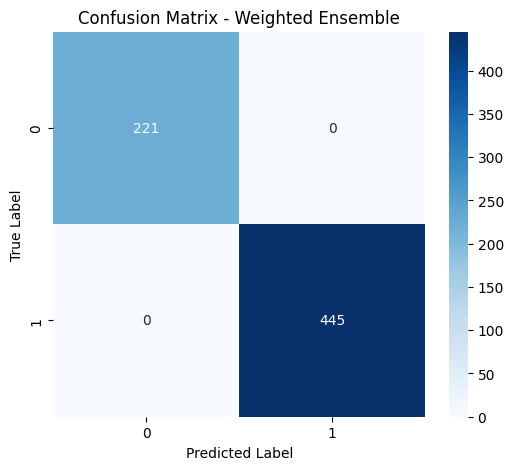

In [21]:
cm = confusion_matrix(y_test, ensemble_preds)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Weighted Ensemble")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [22]:
print("Classification Report - Weighted Ensemble")
print(classification_report(y_test, ensemble_preds))

Classification Report - Weighted Ensemble
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       221
           1       1.00      1.00      1.00       445

    accuracy                           1.00       666
   macro avg       1.00      1.00      1.00       666
weighted avg       1.00      1.00      1.00       666



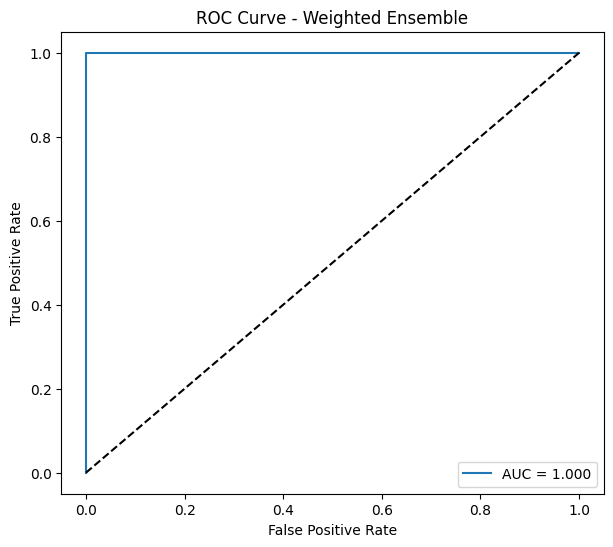

In [23]:
from sklearn.metrics import roc_curve, auc

# Get probability of positive class
probs = ensemble_probs[:, 1]

fpr, tpr, _ = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Weighted Ensemble")
plt.legend()
plt.show()

Week 8

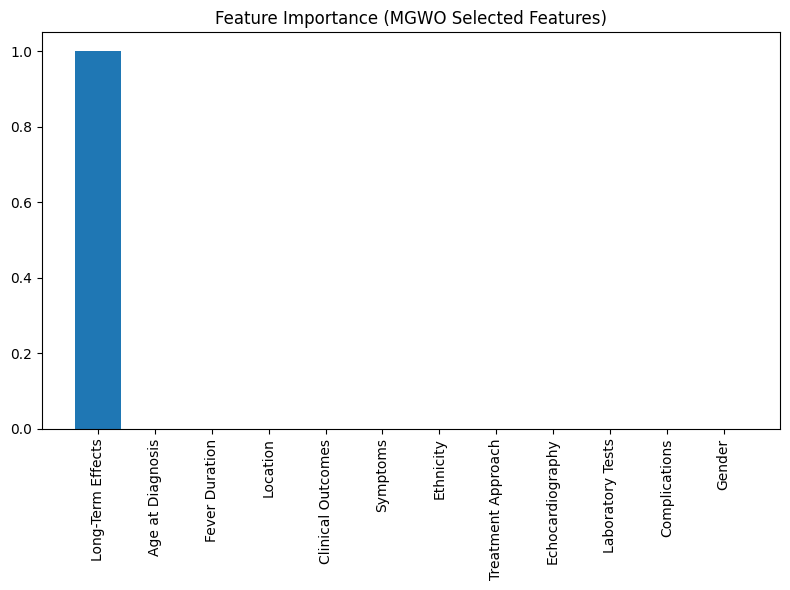

In [26]:
import matplotlib.pyplot as plt

importances = gb.feature_importances_
indices = importances.argsort()[::-1]

plt.figure(figsize=(8,6))
plt.title("Feature Importance (MGWO Selected Features)")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), [selected_features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


In [29]:
import pickle

model_data = {
    "gb_model": gb,
    "ada_model": ada,
    "weight_gb": weight_gb,
    "weight_ada": weight_ada,
    "selected_features": [f"Feature_{i}" for i in range(X_train.shape[1])]
}

with open("weighted_ensemble_model.pkl", "wb") as f:
    pickle.dump(model_data, f)

print("Model saved successfully.")

Model saved successfully.
